<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Importing the Data
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Import and clean the dataset using Pandas
</div>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('C:/Users/HP/OneDrive/Documents/PYTHON/PANDAS/DATABASES/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
139,2019,NaN,NaN,NaN,9.594329
140,2020,NaN,NaN,NaN,9.699874
141,2021,NaN,NaN,NaN,9.886688
142,2022,NaN,NaN,NaN,9.974711


In [13]:
df = df.dropna(subset=['CSIRO Adjusted Sea Level'])
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.531496,8.259843,8.803150,8.104027
130,2010,8.834646,8.555118,9.114173,8.164372
131,2011,8.897638,8.602362,9.192913,8.096821
132,2012,9.244094,8.917323,9.570866,8.492761
133,2013,8.913386,8.562992,9.263780,8.586197


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Scatter Plot
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Using matplotlib to plot the trend of water level since 1880
</div>

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'CSIRO Adjusted Sea Level')]

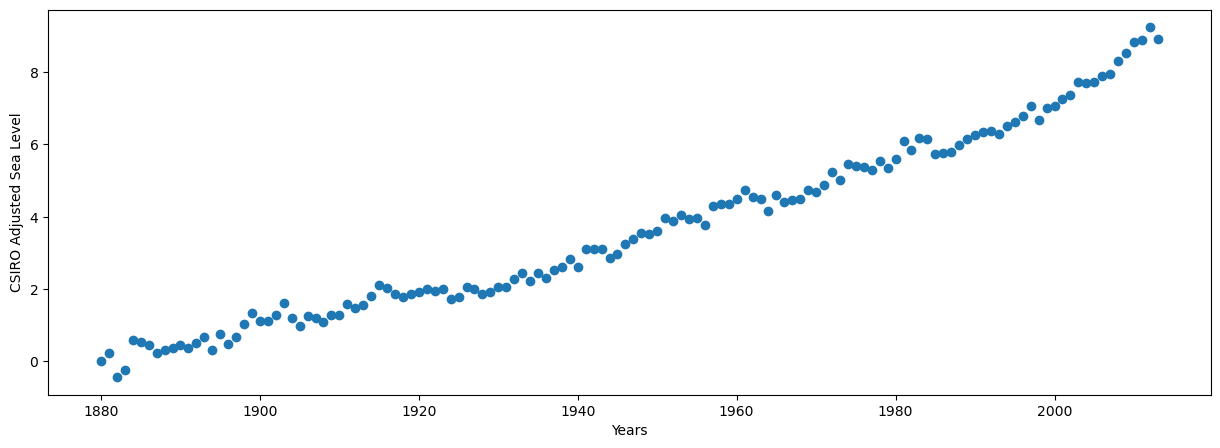

In [16]:
fig ,ax = plt.subplots(figsize = (15,5))
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Years", ylabel = "CSIRO Adjusted Sea Level")

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Line of Best Fit Overtime
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Using line of best fit from 1880 to predict what the sea level would be in 2050
</div>

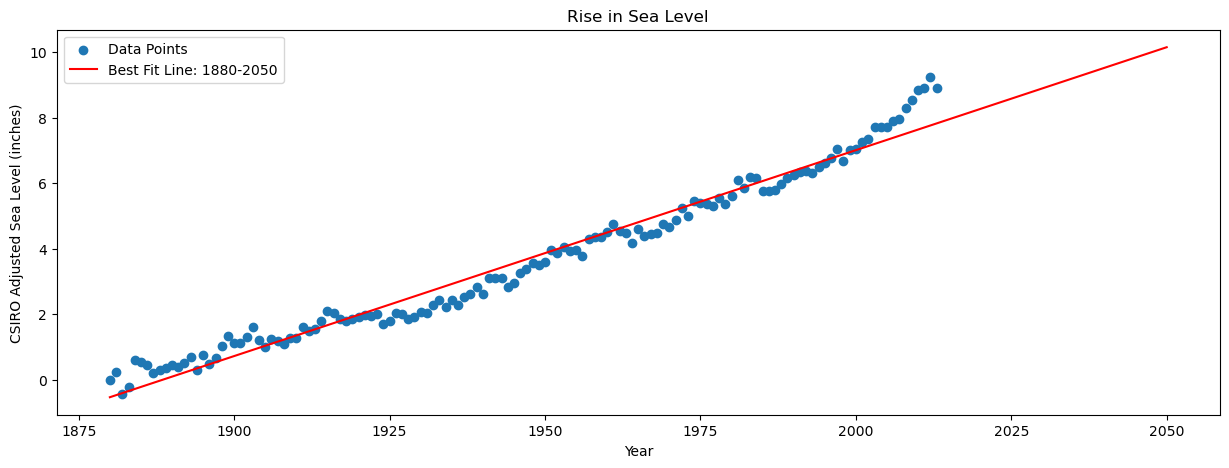

In [19]:
result = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

fig, ax = plt.subplots(figsize=(15, 5))
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

ax.scatter(x, y, label="Data Points")

# Set axis labels
ax.set(xlabel="Year", ylabel="CSIRO Adjusted Sea Level (inches)", title="Rise in Sea Level")

# Generate years up to 2050 for the extended line of best fit
x_future = range(1880, 2051)
ax.plot(x_future, result.slope * x_future + result.intercept, 'r', label="Best Fit Line: 1880-2050")
ax.legend()

plt.show()


<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Using the  line of best fit from the year 2000 to predict what the sea level would be in 2050
</div>

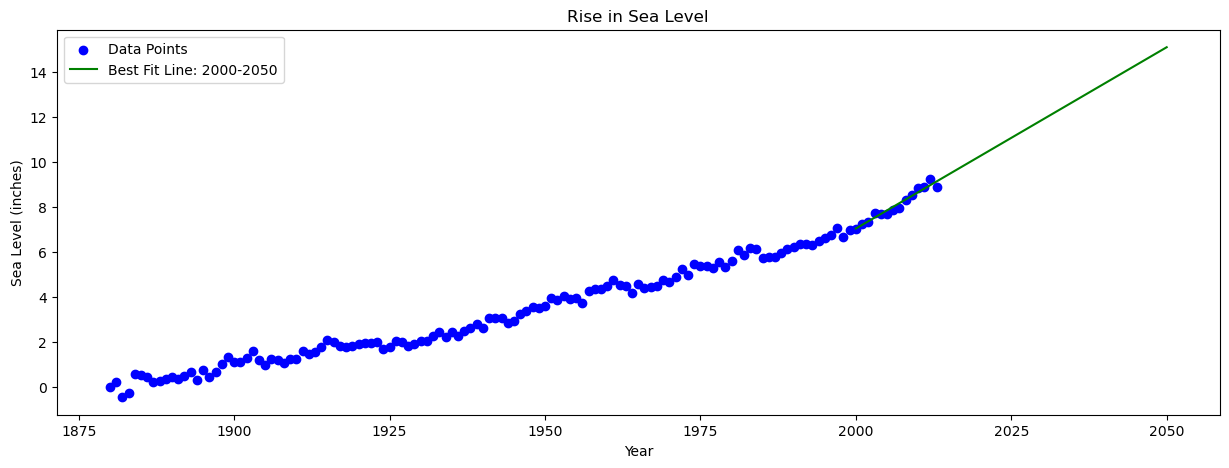

In [31]:
df_2000 = df[df['Year'] >= 2000]

# Perform linear regression on the filtered data
result_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

# Create an extended range of years from 2000 to 2050
years_extended = pd.Series(range(2000, 2051))

# Calculate the line of best fit for the extended years
sea_level_2000_2050 = result_2000.slope * years_extended + result_2000.intercept

# Plot the data points and the new line of best fit
fig, ax = plt.subplots(figsize=(15, 5))

# Scatter plot of the data points
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label="Data Points", color="blue")

# Line of best fit for 2000-2050
ax.plot(years_extended, sea_level_2000_2050, label="Best Fit Line: 2000-2050", color="green")

# Customize the plot
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.legend()

plt.show()

<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    A combined line of best fit predicating possible path
</div>

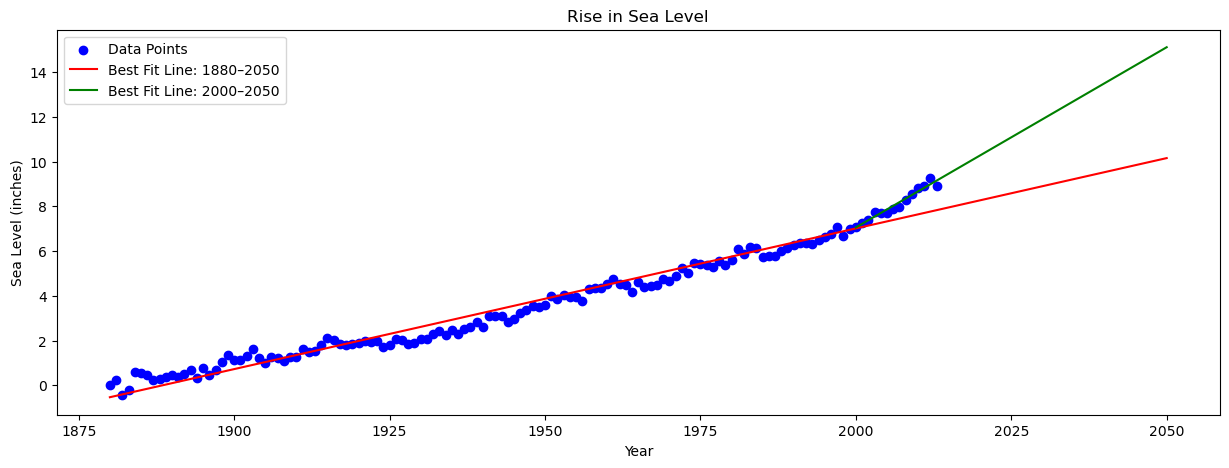

In [36]:
result_full = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Create an extended range of years for the first line (1880–2050)
years_full = pd.Series(range(1880, 2051))
sea_level_full = result_full.slope * years_full + result_full.intercept

# Filter the data for years >= 2000
df_2000 = df[df['Year'] >= 2000]

# Perform linear regression for the filtered dataset (2000–2013)
result_2000 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

# Create an extended range of years for the second line (2000–2050)
years_2000 = pd.Series(range(2000, 2051))
sea_level_2000 = result_2000.slope * years_2000 + result_2000.intercept

# Plot the data points and both lines of best fit
fig, ax = plt.subplots(figsize=(15, 5))

# Scatter plot of the data points
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label="Data Points", color="blue")

# Line of best fit for the entire dataset (1880–2050)
ax.plot(years_full, sea_level_full, label="Best Fit Line: 1880–2050", color="red")

# Line of best fit for the recent data (2000–2050)
ax.plot(years_2000, sea_level_2000, label="Best Fit Line: 2000–2050", color="green")

# Customize the plot
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.legend()

plt.show()